Company                   SYXLy
CR                         0.76
DA                         0.37
FL                        18.64
OPM                      0.0631
RT                        12.44
TAT                        0.41
DE                         6.93
Y                          6.97
PT                          3.4
Sector              Industrials
Predicted_Y           43.896315
Price_Difference      36.926315
Name: 79, dtype: object

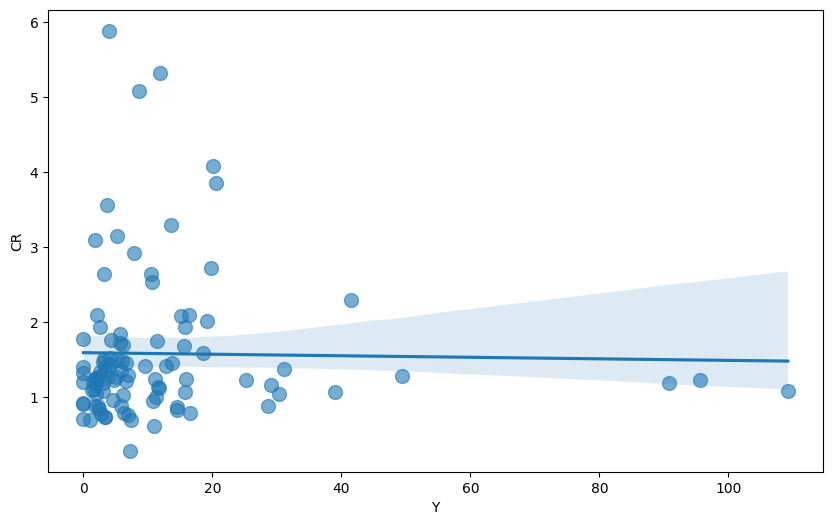

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

data = pd.read_csv("df.csv")
data_corr = data.drop(columns=["Company", "Sector"])

correlation_matrix = data_corr.corr()

plt.figure(figsize=(10, 6))
regression_model = sns.regplot(x='Y', y='CR', data=data_corr, scatter_kws={'s': 100, 'alpha': 0.6})

formula = "Y ~ CR + DA + FL + OPM + RT + TAT + DE + PT"
model = sm.OLS.from_formula(formula=formula, data=data_corr)
results = model.fit()
results.summary()

data["Predicted_Y"] = results.predict(data_corr)
data["Price_Difference"] = data["Predicted_Y"] - data["Y"]
max_difference_row = data.loc[data["Price_Difference"].idxmax()]
max_difference_row
